# Cargar datos climáticos y epidemiológicos en Python.

1. Cargar los datos climáticos que quiere considerar. 
2. Cargar los datos epidemiológicos que quiere considerar.
3. llavarlos a la misma escala (Semanal)
4. fusionales [C|E]
5. crear los atributos de temperatura extrema 
6. crear el atributo de número de días con lluvia. 


In [1]:
# 1. Importar librerias 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.arima.model import ARIMA

# Cargar datos climáticos

In [2]:
# 2. Carga de datos climáticos 
#df1 pd.read_excel(r"C:/Users/marco/OneDrive - Universidad de Antioquia/Documentos/2_recursos_ensenanza/8_arima/Datos_climáticos-(2022-2024).xlsx")
df1 = pd.read_excel(r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Datos climáticos\Datos_climáticos-(2022-2024).xlsx")

In [3]:
df1.head() 

,Año,Día,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima
0,2022,1,28.46,34.23,24.03,71.51,0.33,0.09,0.21,0.01
1,2022,2,28.61,34.59,24.14,71.87,0.91,0.12,0.24,0.02
2,2022,3,29.07,35.43,23.91,69.46,0.11,0.12,0.31,0.01
3,2022,4,29.65,36.10,24.19,63.86,0.00,0.12,0.23,0.04
4,2022,5,29.24,35.75,23.76,64.06,0.01,0.13,0.24,0.02


In [4]:
df1.keys()

Index(['Año', 'Día', 'Temperatura', 'Temperatura máxima', 'Temperatura mínima',
       'Humedad relativa', 'Precipitación', 'Velocidad del viento',
       'Velocidad de viento máximo', 'Velocidad de viento mínima'],
      dtype='object')

In [5]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         1096 non-null   int64  
 1   Día                         1096 non-null   int64  
 2   Temperatura                 1096 non-null   float64
 3   Temperatura máxima          1096 non-null   float64
 4   Temperatura mínima          1096 non-null   float64
 5   Humedad relativa            1096 non-null   float64
 6   Precipitación               1096 non-null   float64
 7   Velocidad del viento        1096 non-null   float64
 8   Velocidad de viento máximo  1096 non-null   float64
 9   Velocidad de viento mínima  1096 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 85.8 KB


In [6]:
df1.describe() 

,Año,Día,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2023.000912,183.166971,27.237828,30.972801,24.375292,85.084763,4.976031,0.153896,0.356679,0.034051
std,0.817055,105.510927,1.662275,3.109907,1.032193,10.300241,7.211492,0.032945,0.110631,0.022732
min,2022.000000,1.000000,23.970000,25.520000,20.800000,52.100000,0.000000,0.070000,0.160000,0.000000
25%,2022.000000,92.000000,26.080000,28.917500,23.750000,80.677500,0.547500,0.130000,0.260000,0.020000
50%,2023.000000,183.000000,26.875000,30.050000,24.410000,89.450000,2.445000,0.150000,0.350000,0.030000
75%,2024.000000,274.250000,27.902500,32.092500,25.010000,92.340000,6.612500,0.170000,0.440000,0.050000
max,2024.000000,366.000000,34.020000,40.960000,28.340000,97.520000,75.780000,0.310000,0.720000,0.110000


# Tarea: 


2. Renombrar a la variable día a día del año. (hecho)
3. dejar la las variables de año y día cómo fecha en dato de tipo datatime de python. (hecho)
4. combine los atributos de año y día del año en un atributo llamado fecha con formato YYYY-MM-DD de pandas.
5. Remuestrear los datos climáticos a una escala de semana epidemiológica.
6. y los datos epidemiológicos agruparlos por semana epidemiológica. 
7. Visualización gráfica de los datos climáticos.

In [7]:
# renombrar el atributo día a día del año 

df1.rename(columns={'Día': 'Día del año'}, inplace=True)

In [8]:
df1.head()

,Año,Día del año,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima
0,2022,1,28.46,34.23,24.03,71.51,0.33,0.09,0.21,0.01
1,2022,2,28.61,34.59,24.14,71.87,0.91,0.12,0.24,0.02
2,2022,3,29.07,35.43,23.91,69.46,0.11,0.12,0.31,0.01
3,2022,4,29.65,36.10,24.19,63.86,0.00,0.12,0.23,0.04
4,2022,5,29.24,35.75,23.76,64.06,0.01,0.13,0.24,0.02


In [9]:
from datetime import datetime

# Función para convertir año + día del año a fecha
def dia_del_año_a_fecha(año, dia):
    try:
        return datetime(año, 1, 1) + pd.Timedelta(days=dia - 1)
    except:
        return pd.NaT  # Maneja días inválidos (ej: día 366 en año no bisiesto)

# Aplicar la función y crear columna "fecha"
df1['fecha'] = df1.apply(lambda x: dia_del_año_a_fecha(x['Año'], x['Día del año']), axis=1)

# Formatear como YYYY-MM-DD (opcional, ya que pandas maneja datetime nativamente)
df1['fecha'] = df1['fecha'].dt.strftime('%Y-%m-%d')

df1.head() 

,Año,Día del año,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima,fecha
0,2022,1,28.46,34.23,24.03,71.51,0.33,0.09,0.21,0.01,NaN
1,2022,2,28.61,34.59,24.14,71.87,0.91,0.12,0.24,0.02,NaN
2,2022,3,29.07,35.43,23.91,69.46,0.11,0.12,0.31,0.01,NaN
3,2022,4,29.65,36.10,24.19,63.86,0.00,0.12,0.23,0.04,NaN
4,2022,5,29.24,35.75,23.76,64.06,0.01,0.13,0.24,0.02,NaN


In [10]:

from datetime import datetime



# Función para convertir año + día del año a fecha
def dia_del_año_a_fecha(año, dia):
    try:
        return datetime(año, 1, 1) + pd.Timedelta(days=dia - 1)
    except:
        return pd.NaT  # Maneja días inválidos (ej: día 366 en año no bisiesto)

# Aplicar la función y crear columna "fecha"
df1['fecha'] = df1.apply(lambda x: dia_del_año_a_fecha(x['Año'], x['Día del año']), axis=1)

# Formatear como YYYY-MM-DD (opcional, ya que pandas maneja datetime nativamente)
df1['fecha'] = df1['fecha'].dt.strftime('%Y-%m-%d')

df1.head() 

,Año,Día del año,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima,fecha
0,2022,1,28.46,34.23,24.03,71.51,0.33,0.09,0.21,0.01,2022-01-01
1,2022,2,28.61,34.59,24.14,71.87,0.91,0.12,0.24,0.02,2022-01-02
2,2022,3,29.07,35.43,23.91,69.46,0.11,0.12,0.31,0.01,2022-01-03
3,2022,4,29.65,36.10,24.19,63.86,0.00,0.12,0.23,0.04,2022-01-04
4,2022,5,29.24,35.75,23.76,64.06,0.01,0.13,0.24,0.02,2022-01-05


# Script para remuestrear el dataframe df1 a semana epidemiológica (domingo a sábado)



### Explicación:
1. **Eliminación de columnas**: Se eliminan las columnas 'Año' y 'Día del año' como solicitaste.
2. **Conversión de fecha**: Se asegura que la columna 'fecha' sea de tipo datetime.
3. **Remuestreo semanal**: 
   - Se usa `resample('W-SUN')` para agrupar por semanas que comienzan en domingo.
   - Se aplican diferentes funciones de agregación para cada variable:
     - Temperaturas: media para la normal, max/mín para extremos
     - Humedad: media
     - Precipitación: suma acumulada semanal
     - Viento: media para velocidad normal, max/mín para extremos
4. **Columnas adicionales**: Se añaden columnas para identificar el año y número de semana epidemiológica.

El resultado será un dataframe con datos agregados por semana epidemiológica (domingo a sábado) para todo el período 2022-2024.

In [11]:
import pandas as pd

# Asumiendo que df1 ya está cargado en memoria

# Paso 1: Eliminar las columnas 'Año' y 'Día del año'
df1 = df1.drop(columns=['Año', 'Día del año'])

# Paso 2: Asegurarse que 'fecha' es de tipo datetime
df1['fecha'] = pd.to_datetime(df1['fecha'])

# Paso 3: Remuestreo a semana epidemiológica (domingo a sábado)
# Primero establecemos 'fecha' como índice
df1.set_index('fecha', inplace=True)

# Definimos la función para determinar la semana epidemiológica
def get_epidemiological_week(date):
    # Semana epidemiológica comienza en domingo (0) y termina en sábado (6)
    return (date - pd.to_timedelta(date.dayofweek + 1, unit='D')).strftime('%Y-%U')

# Remuestreamos por semana epidemiológica
# Usamos 'W-SUN' para que las semanas vayan de domingo a sábado
df_clima_semanal = df1.resample('W-SUN').agg({
    'Temperatura': 'mean',
    'Temperatura máxima': 'max',
    'Temperatura mínima': 'min',
    'Humedad relativa': 'mean',
    'Precipitación': 'sum',
    'Velocidad del viento': 'mean',
    'Velocidad de viento máximo': 'max',
    'Velocidad de viento mínima': 'min'
})

# Resetear el índice para tener 'fecha' como columna nuevamente
df_clima_semanal.reset_index(inplace=True)

# Opcional: Agregar columnas de año y semana epidemiológica
df_clima_semanal['Año epidemiológico'] = df_clima_semanal['fecha'].dt.year
df_clima_semanal['Semana epidemiológica'] = df_clima_semanal['fecha'].dt.isocalendar().week

# Mostrar las primeras filas del resultado
df_clima_semanal.head()

,fecha,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima,Año epidemiológico,Semana epidemiológica
0,2022-01-02,28.535000,34.59,24.03,71.690000,1.24,0.105000,0.24,0.01,2022,52
1,2022-01-09,28.128571,36.10,22.75,70.544286,11.47,0.120000,0.31,0.01,2022,1
2,2022-01-16,27.240000,35.01,22.17,73.188571,13.15,0.115714,0.25,0.00,2022,2
3,2022-01-23,29.395714,38.15,23.97,67.442857,1.71,0.112857,0.25,0.01,2022,3
4,2022-01-30,29.078571,36.46,23.30,65.702857,1.97,0.140000,0.29,0.04,2022,4


In [12]:
# Seleccionar solo las variables climáticas que nos interesan
variables_climaticas = [
    'Temperatura',
    'Temperatura máxima',
    'Temperatura mínima',
    'Humedad relativa',
    'Precipitación',
    'Velocidad del viento',
    'Velocidad de viento máximo',
    'Velocidad de viento mínima'
]

# Calcular el promedio semanal de las variables climáticas (domingo a sábado)
df1_semanal = df1[variables_climaticas].resample('W-SUN').mean().reset_index()

# Crear columnas de año y semana epidemiológica usando la columna 'fecha' (ahora existe tras reset_index)
df1_semanal['año'] = df1_semanal['fecha'].dt.isocalendar().year
df1_semanal['semana'] = df1_semanal['fecha'].dt.isocalendar().week

# Crear columna combinada Año_Semana (ej: "2023-01")
df1_semanal['Año_Semana'] = df1_semanal['año'].astype(str) + '-' + df1_semanal['semana'].astype(str).str.zfill(2)

# Dejar solo Año_Semana y las variables climáticas
df_clima_por_semana = df1_semanal[['Año_Semana'] + variables_climaticas].set_index('Año_Semana')

# Mostrar resultado
df_clima_por_semana.head()



,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima
Año_Semana,,,,,,,,
2021-52,28.535000,34.410000,24.085000,71.690000,0.620000,0.105000,0.225000,0.015000
2022-01,28.128571,34.135714,23.594286,70.544286,1.638571,0.120000,0.240000,0.025714
2022-02,27.240000,32.990000,23.037143,73.188571,1.878571,0.115714,0.228571,0.025714
2022-03,29.395714,35.590000,24.748571,67.442857,0.244286,0.112857,0.225714,0.037143
2022-04,29.078571,35.778571,24.152857,65.702857,0.281429,0.140000,0.265714,0.074286


# Importación datos epidemiológicos  



In [13]:
#df2= pd.read_excel(r"C:\Users\marco\OneDrive - Universidad de Antioquia\Documentos\2_recursos_ensenanza\8_arima\BS_DENGUE_SEC_SALUD_2022-2024.xlsx")
df2=pd.read_excel(r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Secretaria de salud\BS_DENGUE_SEC_SALUD_2022-2024.xlsx")

In [14]:
df2.head() 

,cod_eve,fec_not,semana,año,cod_pre,cod_sub,edad_,uni_med_,nacionali_,nombre_nacionalidad,...,nom_upgd,npais_proce,ndep_proce,nmun_proce,npais_resi,ndep_resi,nmun_resi,ndep_notif,nmun_notif,nreg
0,210,2022-01-01,52,2021,515402201,1,31,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2142
1,210,2022-01-01,52,2021,515402201,1,16,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2144
2,210,2022-01-01,52,2021,515402201,1,79,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2152
3,210,2022-01-01,52,2021,515402201,1,14,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,CACERES,COLOMBIA,ANTIOQUIA,CACERES,ANTIOQUIA,CAUCASIA,2154
4,210,2022-01-01,52,2021,515402201,1,4,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2140


In [15]:
df2.keys()

Index(['cod_eve', 'fec_not', 'semana', 'año', 'cod_pre', 'cod_sub', 'edad_',
       'uni_med_', 'nacionali_', 'nombre_nacionalidad',
       ...
       'nom_upgd', 'npais_proce', 'ndep_proce', 'nmun_proce', 'npais_resi',
       'ndep_resi', 'nmun_resi', 'ndep_notif', 'nmun_notif', 'nreg'],
      dtype='object', length=120)

In [16]:
# Convertir la columna 'fec_not' a tipo datetime
df2['fec_not'] = pd.to_datetime(df2['fec_not'], errors='coerce')

# Filtrar los datos entre 2022 y 2024
df2 = df2[df2['fec_not'].dt.year.isin([2022, 2023, 2024])]

# Establecer la fecha como índice
df2.set_index('fec_not', inplace=True)

# Contar casos por semana epidemiológica (domingo a sábado)
df2_epi_semanal = df2.resample('W-SUN').size().reset_index(name='Casos') 

# Crear columnas de año y semana
df2_epi_semanal['año'] = df2_epi_semanal['fec_not'].dt.isocalendar().year
df2_epi_semanal['semana'] = df2_epi_semanal['fec_not'].dt.isocalendar().week

# Crear columna combinada 'Año_Semana'
df2_epi_semanal['Año_Semana'] = df2_epi_semanal['año'].astype(str) + '-' + df2_epi_semanal['semana'].astype(str).str.zfill(2)

# Seleccionar columnas necesarias y establecer índice
df_casos_por_semana = df2_epi_semanal[['Año_Semana', 'Casos']].set_index('Año_Semana')

# Mostrar las primeras filas
df_casos_por_semana.head()


,Casos
Año_Semana,
2021-52,8
2022-01,4
2022-02,4
2022-03,5
2022-04,3


## Unión de base de datos

In [17]:
# Unir los DataFrames usando el índice 'Año_Semana'
df_final = df_casos_por_semana.join(df_clima_por_semana, how='inner')

# Mostrar las primeras filas del DataFrame combinado
df_final.head()


,Casos,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima
Año_Semana,,,,,,,,,
2021-52,8,28.535000,34.410000,24.085000,71.690000,0.620000,0.105000,0.225000,0.015000
2022-01,4,28.128571,34.135714,23.594286,70.544286,1.638571,0.120000,0.240000,0.025714
2022-02,4,27.240000,32.990000,23.037143,73.188571,1.878571,0.115714,0.228571,0.025714
2022-03,5,29.395714,35.590000,24.748571,67.442857,0.244286,0.112857,0.225714,0.037143
2022-04,3,29.078571,35.778571,24.152857,65.702857,0.281429,0.140000,0.265714,0.074286


## Mayo 31 – Junio 7  
**Tarea:** Generar visualizaciones exploratorias de las series temporales  
**Objetivo:** Identificar tendencias, estacionalidades y valores atípicos  
**Desarrollo:**
- Graficar la serie de casos de dengue y cada variable climática
- Observar patrones visuales (incrementos, caídas, estacionalidad)
- Identificar posibles outliers
- Guardar gráficos para incluir en tesis como análisis exploratorio

### Gráfico de los casos de dengue por año por semana epidemiológica

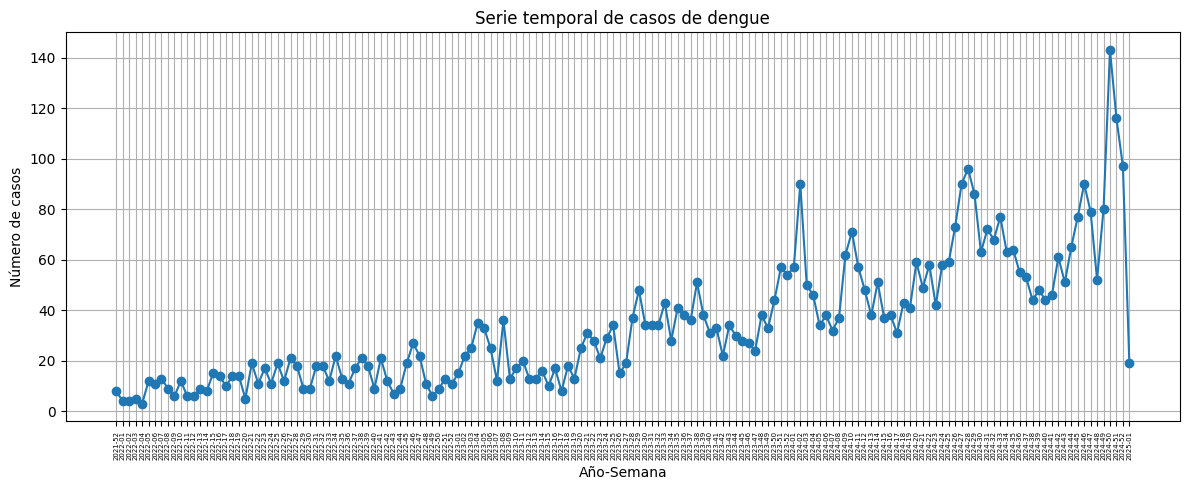

In [18]:
import matplotlib.pyplot as plt

# df_casos_por_semana tiene el índice 'Año_Semana' y la columna 'casos'
plt.figure(figsize=(12, 5))
plt.plot(df_casos_por_semana.index, df_casos_por_semana['Casos'], marker='o', linestyle='-')
plt.xticks(rotation=90, fontsize=5)  # tamaño de letra más pequeño
plt.yticks(fontsize=10)               # opcional: también reducir eje Y
plt.title('Serie temporal de casos de dengue')
plt.xlabel('Año-Semana')
plt.ylabel('Número de casos')
plt.grid(True)
plt.tight_layout()
plt.savefig('casos_dengue.png', dpi=300)  # guardar gráfico
plt.show()



### Gráfico de variables climáticas por año por semana epidemiológica

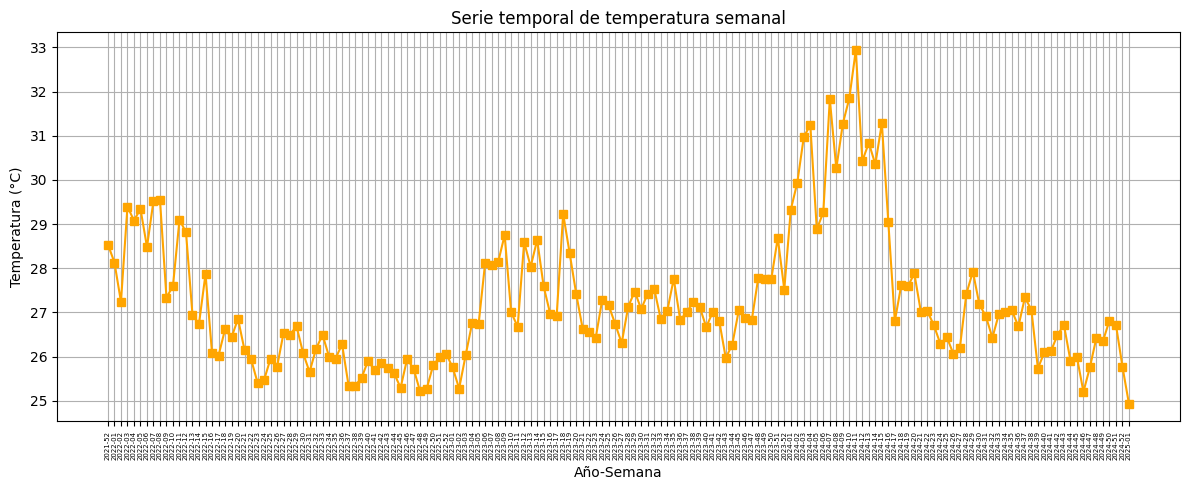

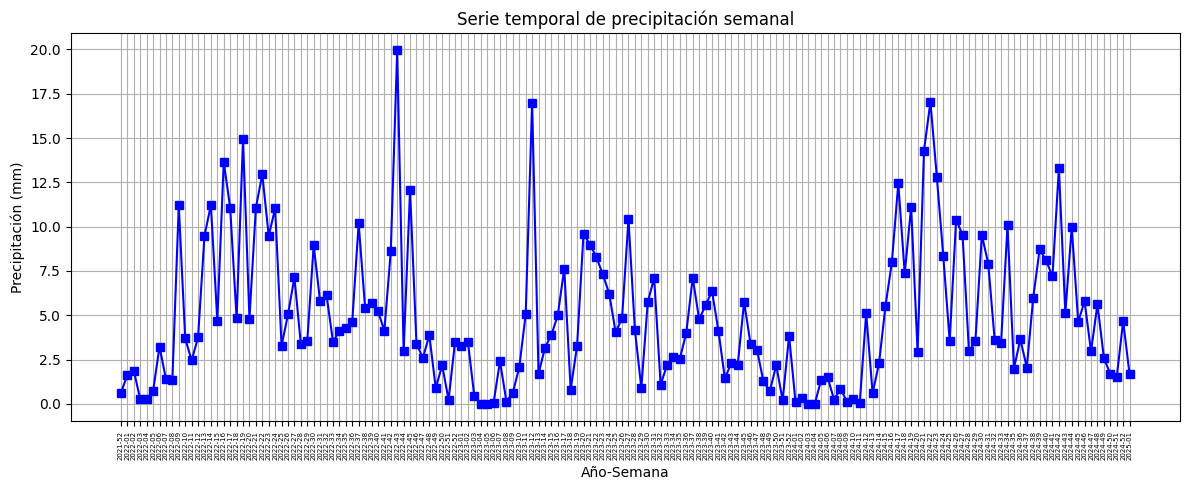

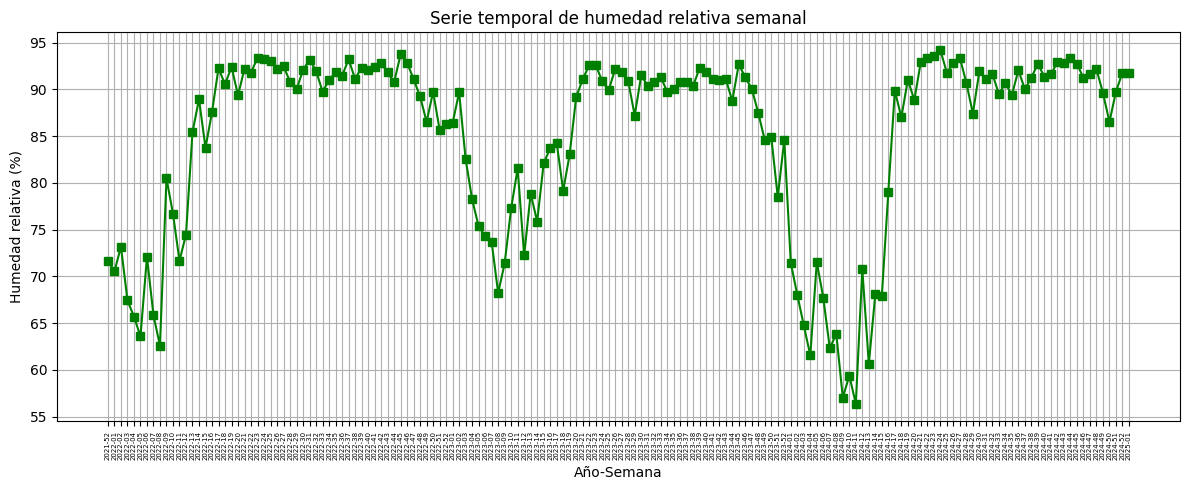

In [19]:
# Temperatura
plt.figure(figsize=(12, 5))
plt.plot(df_clima_por_semana.index, df_clima_por_semana['Temperatura'], color='orange', marker='s')
plt.xticks(rotation=90, fontsize=5)  # tamaño de letra más pequeño
plt.yticks(fontsize=10)
plt.title('Serie temporal de temperatura semanal')
plt.xlabel('Año-Semana')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.tight_layout()
plt.savefig('temperatura_semanal.png', dpi=300)
plt.show()

# Precipitación
plt.figure(figsize=(12, 5))
plt.plot(df_clima_por_semana.index, df_clima_por_semana['Precipitación'], color='blue', marker='s')
plt.xticks(rotation=90, fontsize=5)  # tamaño de letra más pequeño
plt.yticks(fontsize=10)
plt.title('Serie temporal de precipitación semanal')
plt.xlabel('Año-Semana')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacion_semanal.png', dpi=300)
plt.show()

# Humedad relativa
plt.figure(figsize=(12, 5))
plt.plot(df_clima_por_semana.index, df_clima_por_semana['Humedad relativa'], color='green', marker='s')
plt.xticks(rotation=90, fontsize=5)  # tamaño de letra más pequeño
plt.yticks(fontsize=10)
plt.title('Serie temporal de humedad relativa semanal')
plt.xlabel('Año-Semana')
plt.ylabel('Humedad relativa (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig('humedad_relativa_semanal.png', dpi=300)
plt.show()

### Gráfico de relación entre el número de casos y variables climáticas 

#### Gráfico Casos Vs Temperatura

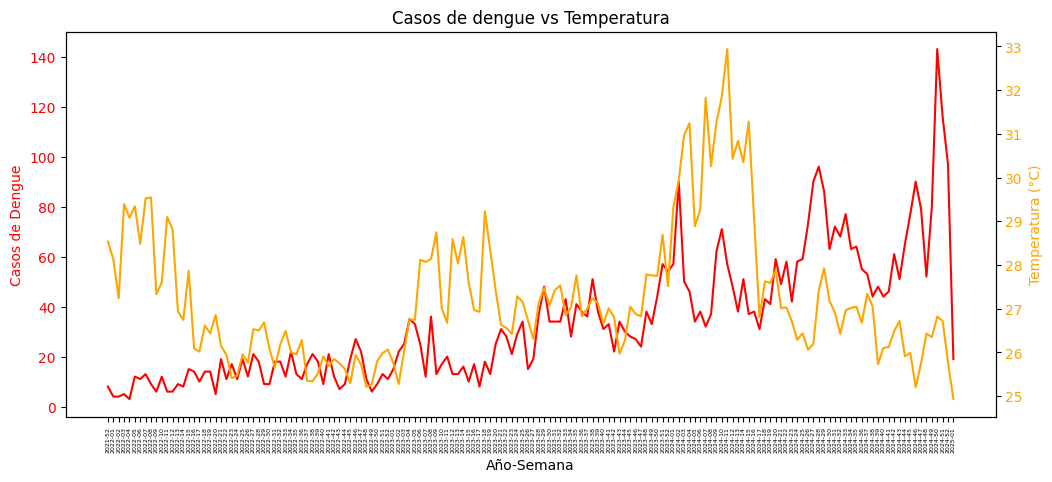

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_xlabel('Año-Semana')
ax1.set_ylabel('Casos de Dengue', color='red')
ax1.plot(df_casos_por_semana.index, df_casos_por_semana['Casos'], color='red', label='Casos de Dengue')
ax1.tick_params(axis='y', labelcolor='red')
ax1.tick_params(axis='x', rotation=90, labelsize=4.5)

ax2 = ax1.twinx()  # Eje secundario
ax2.set_ylabel('Temperatura (°C)', color='orange')
ax2.plot(df_clima_por_semana.index, df_clima_por_semana['Temperatura'], color='orange', label='Temperatura')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Casos de dengue vs Temperatura')     
plt.savefig('casos_vs_temperatura.png', dpi=300)
plt.show()

#### Gráfico Casos Vs Humedad relativa

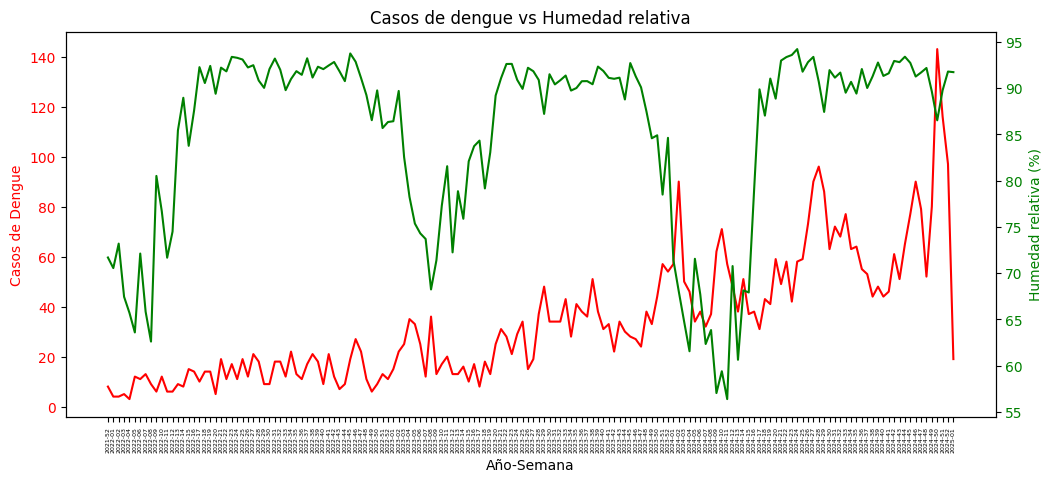

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_xlabel('Año-Semana')
ax1.set_ylabel('Casos de Dengue', color='red')
ax1.plot(df_casos_por_semana.index, df_casos_por_semana['Casos'], color='red', label='Casos de Dengue')
ax1.tick_params(axis='y', labelcolor='red')
ax1.tick_params(axis='x', rotation=90, labelsize=4.5)

ax2 = ax1.twinx()  # Eje secundario
ax2.set_ylabel('Humedad relativa (%)', color='green')
ax2.plot(df_clima_por_semana.index, df_clima_por_semana['Humedad relativa'], color='green', label='Humedad relativa')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Casos de dengue vs Humedad relativa')
plt.savefig('casos_vs_humedad.png', dpi=300)
plt.show()

#### Gráfico Casos Vs Precipitación

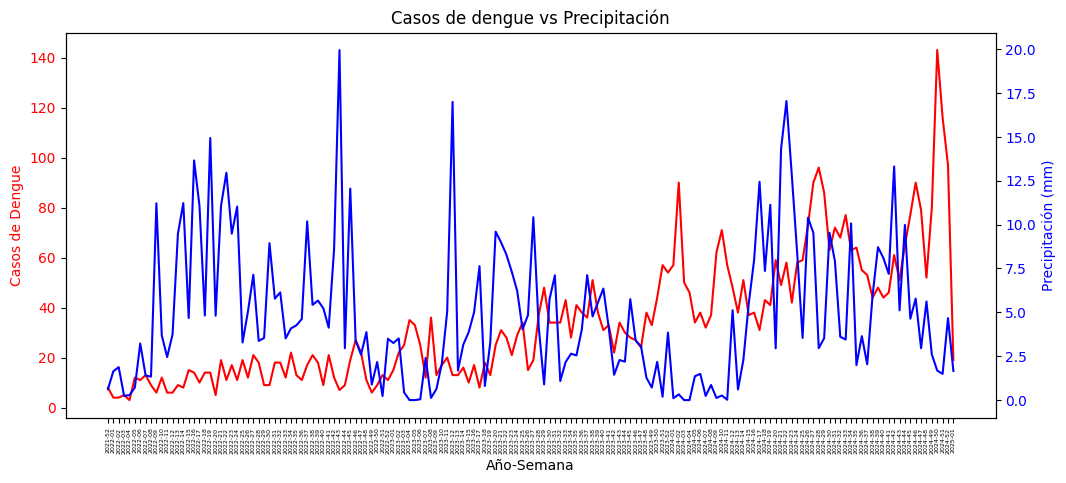

In [22]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_xlabel('Año-Semana')
ax1.set_ylabel('Casos de Dengue', color='red')
ax1.plot(df_casos_por_semana.index, df_casos_por_semana['Casos'], color='red', label='Casos de Dengue')
ax1.tick_params(axis='y', labelcolor='red')
ax1.tick_params(axis='x', rotation=90, labelsize=4.5)  # Reducir tamaño de fuente en eje x

ax2 = ax1.twinx()  # Eje secundario
ax2.set_ylabel('Precipitación (mm)', color='blue')
ax2.plot(df_clima_por_semana.index, df_clima_por_semana['Precipitación'], color='blue', label='Precipitación')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Casos de dengue vs Precipitación')
plt.savefig('casos_vs_precipitacion.png', dpi=300)
plt.show()


# Práctica de resampling  



Para el **remuestreo de datos climáticos diarios a semanas epidemiológicas**, te recomiendo el siguiente enfoque:

---



### **1. Definición clave:**
- **Semana epidemiológica** (según OMS/OPS):
  - Comienza en **domingo** y termina en **sábado**.
  - La primera semana del año contiene el primer jueves de enero.
  - Se representa con el formato `YYYY-Www` (ej: `2023-W01`).





### **2. Criterio recomendado para el remuestreo:**
1. **Frecuencia de agrupación:**  
   Usar `'W-SUN'` en pandas para alinear las semanas de domingo a sábado.

2. **Función de agregación:**  
   - **Para variables acumulativas** (ej: precipitación):  
     ```python
     df.resample('W-SUN').sum()
     ```
   - **Para variables promedio** (ej: temperatura):  
     ```python
     df.resample('W-SUN').mean()
     ```
   - **Para extremos** (ej: temperatura máxima):  
     ```python
     df.resample('W-SUN').max()
     ```

3. **Etiquetado de fechas:**  
   Asignar cada semana a la **fecha de inicio (domingo)** para mantener consistencia epidemiológica:
   ```python
   df_semanal = df.resample('W-SUN', label='left').sum()
   ```

---

### **3. Implementación en Python:**


In [23]:

import pandas as pd

# Ejemplo con datos climáticos diarios (fecha, temperatura, precipitación)
df = pd.DataFrame({
    'Año_Semana': pd.date_range('2023-01-01', '2023-12-31'),
    'temp': [25 + 5 * abs(np.sin(i/10)) for i in range(365)],  # Datos simulados
    'precip': np.random.randint(0, 20, 365)
})
df.set_index('Año_Semana', inplace=True)

# Remuestreo a semanas epidemiológicas (sábado a domingo)
df_semanal = df.resample('W-SUN', label='left').agg({
    'temp': 'mean',    # Temperatura promedio semanal
    'precip': 'sum'    # Precipitación acumulada semanal
})

# Formatear índice como "Año-Núm.Semana" (ej: 2023-01)
df_semanal.index = df_semanal.index.strftime('%Y-%U')

df_semanal.head()


,temp,precip
Año_Semana,,
2022-52,25.000000,6
2023-01,26.908376,72
2023-02,29.367435,83
2023-03,29.772420,66
2023-04,27.932862,98



---

### **4. Resultado:**
| Índice    | Temp (Prom) | Precip (Suma) |
|-----------|-------------|---------------|
| 2023-00  | 25.32       | 84            |
| 2023-01  | 26.15       | 92            |
| ...       | ...         | ...           |

---

### **5. Validación adicional:**
- **Verificar semanas incompletas** (ej: inicio/fin de año):  
  ```python
  df_semanal['dias_incluidos'] = df.resample('W-SUN').count()['temp']
  ```
- **Alineación con estándares epidemiológicos**:  
  Usar la librería `epiweeks` para coincidir con el sistema de la OMS:
  ```python
  from epiweeks import Week

  # Convertir fechas a semanas epidemiológicas
  df['semana_epi'] = df.index.to_series().apply(lambda x: Week.fromdate(x).cdcformat())
  ```

---

### **6. Recomendaciones finales:**
- **Consistencia:** Asegurar que todas las semanas tengan 7 días (excepto posibles semanas incompletas en los extremos).
- **Documentación:** Registrar el criterio de agregación (ej: "precipitación semanal = suma diaria acumulada").
- **Visualización:** Usar gráficos de barras para variables acumulativas y líneas para promedios.

Este método garantiza compatibilidad con análisis epidemiológicos y climáticos.

## 🗓️ Junio 7 – Junio 14  
**Tarea:** Analizar correlaciones entre clima y dengue  
**Objetivo:** Determinar asociaciones preliminares entre variables  
**Desarrollo:**
- Calcular coeficientes de Pearson y Spearman
- Graficar matrices de correlación con mapas de calor
- Analizar rezagos visuales en las series climáticas
- Anotar variables con mayor correlación

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Pearson
correlacion_pearson = df_final.corr(method='pearson')

# Spearman
correlacion_spearman = df_final.corr(method='spearman')


In [29]:
## Distribución de los datos 
from scipy.stats import shapiro
import pandas as pd

# Filtrar solo columnas numéricas
df_numericas = df_final.select_dtypes(include='number')

# Crear una tabla resumen
resultados_normalidad = []

for columna in df_numericas.columns:
    datos = df_numericas[columna].dropna()
    if len(datos) >= 3:  # Requiere al menos 3 datos
        stat, p = shapiro(datos)
        normal = "Sí" if p > 0.05 else "No"
        resultados_normalidad.append({
            'Variable': columna,
            'Estadístico W': round(stat, 4),
            'p-valor': round(p, 4),
            '¿Distribución Normal?': normal
        })

df_normalidad = pd.DataFrame(resultados_normalidad)
print(df_normalidad)


                     Variable  Estadístico W  p-valor ¿Distribución Normal?
0                       Casos         0.8911   0.0000                    No
1                 Temperatura         0.8924   0.0000                    No
2          Temperatura máxima         0.8319   0.0000                    No
3          Temperatura mínima         0.9809   0.0274                    No
4            Humedad relativa         0.7787   0.0000                    No
5               Precipitación         0.9090   0.0000                    No
6        Velocidad del viento         0.9800   0.0218                    No
7  Velocidad de viento máximo         0.9747   0.0053                    No
8  Velocidad de viento mínima         0.9571   0.0001                    No
9                   temp_lag2         0.8886   0.0000                    No


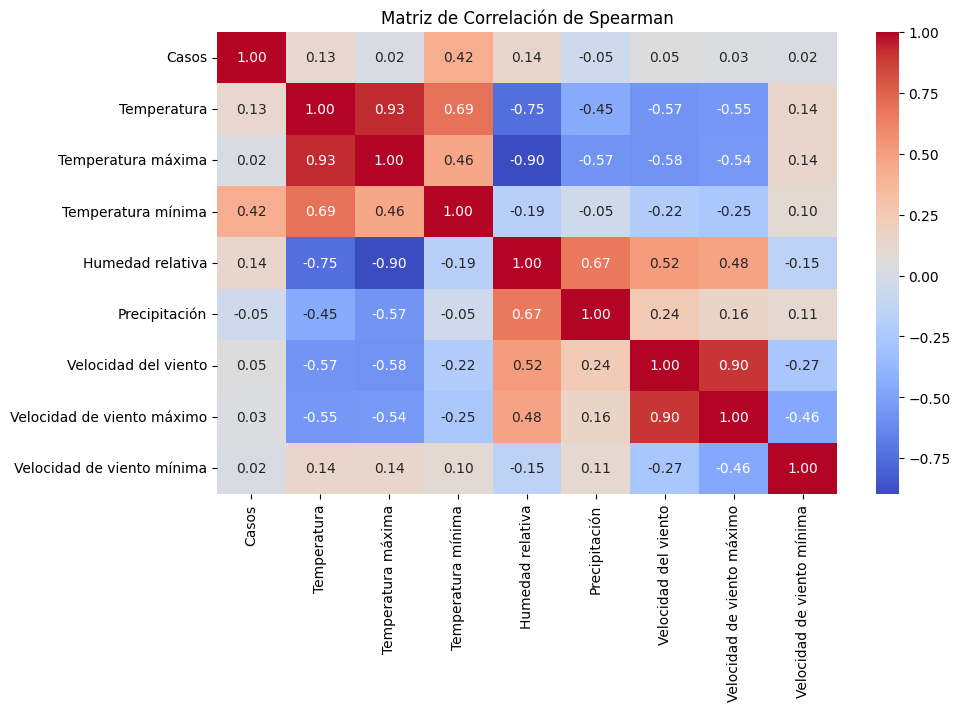

In [30]:
# Pearson
#plt.figure(figsize=(10, 6))
#sns.heatmap(correlacion_pearson, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Matriz de Correlación de Pearson')
#plt.show()

# Spearman
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Spearman')
plt.show()


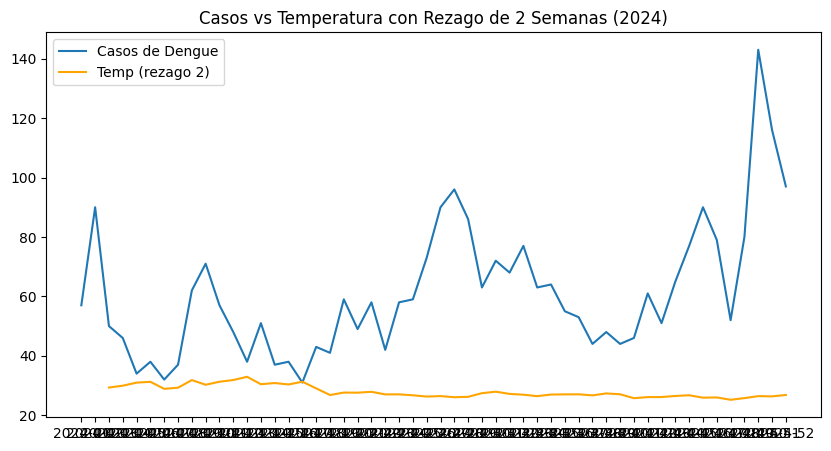

In [31]:
# Filtrar solo el año 2024
df_2024 = df_final.loc[df_final.index.str.startswith('2024')].copy()

# Crear columna de temperatura con rezago de 2 semanas (si no existe)
df_2024['temp_lag2'] = df_2024['Temperatura'].shift(2)

# Gráfico comparativo solo para 2024
plt.figure(figsize=(10, 5))
plt.plot(df_2024.index, df_2024['Casos'], label='Casos de Dengue')
plt.plot(df_2024.index, df_2024['temp_lag2'], label='Temp (rezago 2)', color='orange')
plt.title('Casos vs Temperatura con Rezago de 2 Semanas (2024)')
plt.legend()
plt.show()
